In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

In [3]:
print(tf.__version__)

2.0.0


## Definitions:

- **epoch:** It is the entire processing by the learning algorithm of the entire train-set. The number of epochs is how many times the algorithm is going to run and see the full train-set. The number of epochs affects directly (or not) the result of the training step (with just a few epochs you can reach only a local minimum, but with more epochs, you can reach a global minimum or at least a better local minimum).
- **tensor:** According to the tensorflow website, a tensor is a generalization of vectors and matrices to potentially higher dimensions. Internally, TensorFlow represents tensors as n-dimensional arrays of base datatypes. Each tensor has a data type and a shape. There are the main object we will manipulate with TensorFlow, that will be passes through our programms. A tensor will be defined by the followings:
    - Rank: That's the dimension of the tensor (0 for scaler, 1 for vector, 2 for matrices etc...)
    - Shape: The number of elements in each dimension and the number of dimensions.
- **graph:** This is the first step when creating a model using tensorflow. A graph represents the data flow computations (the nodes and operations and how they are connected to each other).
- **session:** This is the second step in creating a model. A session is the object that evaluate, run the graph on some data. When one need to evaluate a tensor, one must create a "session" since tensors represents a partially complete computation.

## Exemple
### Building tensors

In [4]:
# These are 0-Dimensional tensors, hence scalers
string = tf.Variable("this is a string", tf.string)
number = tf.Variable(42, tf.int16)
float_number = tf.Variable(3.14, tf.float32)

# This is 1-Dimensional tensor, hence, a vector
string_1D = tf.Variable(['This is a string','This is another string'], tf.string)

# This is a 2-Dimensional tensor, hence, a matrice (2*2)
string_2D = tf.Variable([['string11','string12'],['string21','string22']])

# Etc...
# We also refer to 1D tensors as "rank1_tensors" and 2D tensors as "rank2_tensors"

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
string

<tf.Variable 'Variable:0' shape=() dtype=string>

In [6]:
string_1D

<tf.Variable 'Variable_3:0' shape=(2,) dtype=string>

In [7]:
tf.rank(string_2D)

<tf.Tensor 'Rank:0' shape=() dtype=int32>

The "numpy=2" means that this is a rank2 tensor, hence, a matrix. We still can access the shape of a tensor using the .shape

In [8]:
string_2D.shape

TensorShape([Dimension(2), Dimension(2)])

## Reshaping tensors

In [9]:
tensor1 = tf.ones([12]) #This is a vector full of one
print(tensor1)
print("the rank is " + str(tf.rank(tensor1)))

Tensor("ones:0", shape=(12,), dtype=float32)
the rank is Tensor("Rank_1:0", shape=(), dtype=int32)


In [10]:
tensor2 = tf.ones([6,2]) #This is a matrix full on one, with 5 rows and 2 columns
print(tensor2)

Tensor("ones_1:0", shape=(6, 2), dtype=float32)


In [11]:
tensor3 = tf.ones([3,2,2]) # This is a matrix with 3 rows, 2 columns and 2 layers in width
print(tensor3)

Tensor("ones_2:0", shape=(3, 2, 2), dtype=float32)


In [12]:
tensor4 = tf.reshape(tensor3, [6,2]) #Or with [6,-1] it works as well
print(tensor4) 

Tensor("Reshape:0", shape=(6, 2), dtype=float32)


In [13]:
tensor5 = tf.reshape(tensor2, [12])
print(tensor5)

Tensor("Reshape_1:0", shape=(12,), dtype=float32)


# Linear Regression
## Simple linear regression
from "ML Glossary"

In [14]:
path = "C:\\Users\\foucardguimax\\Desktop\\PortFolio\\Advertising.txt"
data = pd.read_csv(path, sep=",")
data = data.drop(['Index','TV','newspaper'], axis = 1)
print(data.head())

   radio  sales
0   37.8   22.1
1   39.3   10.4
2   45.9    9.3
3   41.3   18.5
4   10.8   12.9


We want to build a model to estimate the sales given the amount of money spent on advertisment (here on Radio)

## Making prediction

Text(0, 0.5, 'Sales')

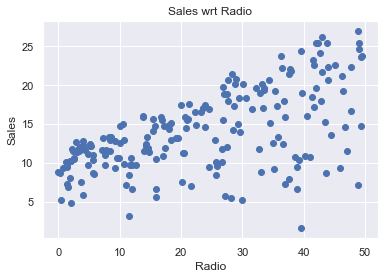

In [15]:
plt.scatter(data['radio'], data['sales'])
plt.title('Sales wrt Radio')
plt.xlabel('Radio')
plt.ylabel('Sales')

We can clearly see that there is some kind of linear patern between these two varaibles. We want to implement the following equation: predicted_sales = Radio * weight + Bias

In [16]:
def predict_sales(radio, weight, bias):
    return(weight*radio + bias)

## Cost function
Here we will use the MSE (L2) function as cost function. This function will return a score that represents the fit of our previous equation to the data. The lowest the cost function, the better our model will be.
\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^n (y_i - (mx_i + b))^2
\end{equation}

\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^n (y_i - (y_{pred}))^2
\end{equation}

In [17]:
def cost_function(sales, radio, weight, bias):
    N = len(radio)
    total_error = 0.0
    
    predicted_sales = predict_sales(radio, weight, bias)
    
    for i in range(N):
        total_error += (sales[i] - predicted_sales[i])**2
    return(total_error / N)

Now we built our cost_function, we need to find a way to minimize it. To do this, we will use the gradient descent.

**Math** Here there are 2 parameters we want to estimate: the weight "m" and bias "b". To use the gradient descent on both of those, we need to calculate the partial derivatives of the cost_function for each varaible (we calculate the gradient of the cost function). Here is it:
\begin{equation}
 grad(f) = \binom{\frac{\partial f}{\partial m}}{\frac{\partial f}{\partial b}} = \binom{\frac{1}{N} \sum_{i=1}^n -2x_i(y_i - (mx_i + b))}{\frac{1}{N} \sum_{i=1}^n -2(y_i - (mx_i + b))}
 \end{equation}

In [18]:
def update_weights(radio, sales, weight, bias, learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    N = len(radio)
    
    for i in range(N):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        weight_deriv += -2*radio[i] * (sales[i] - (weight*radio[i] + bias))
        
        # -2(y - (mx + b))
        bias_deriv += -2*(sales[i] - (weight*radio[i] + bias))
    
    # We subtract because the derivatives point in direction of steepest ascent
    weight -= (weight_deriv / N) * learning_rate
    bias -= (bias_deriv / N ) * learning_rate
    
    return(weight, bias)

In this code we can see a new parameter: "In machine learning and statistics, the learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function" (Wikipédia)

The gradient has to be calculated for the weights and bias for all of the samples in the dataset. The partial derivatives indicates de slope of the curve of the cost_function for the given variable at the current position. To reduce the cost_function, we move in the opposite directection of the gradient. Since the gradient always indicates the way from low values to high values (physical definition) we need to move in the opposite direction indicated by the gradient to minimize the cost_fucntion.

## Training
In this section we will improve our model (deacrese the cost function) each time we go through the whole data by updating, at the same time, the weights and bias. The training is complete when we reach the wanted error threshold or when the coest_function connot be reduced anymore.

Before strating to train our model, we need to initialize our weights and bias (those are the default values). These are new hyperparameters, such as the learning rate.

In [19]:
def train(radio, sales, weight, bias, learning_rate, iters):
    # "iters" will be the number of iteration
    cost_history = [] # We will track each values of the cost_function to see it's evolution
    weight_history, bias_history = [],[]
    
    for i in range(iters):
        weight,bias = update_weights(radio, sales, weight, bias, learning_rate)
        
        #Calculate cost for auditing purposes
        cost = cost_function(radio, sales, weight, bias)
        cost_history.append(cost)

        weight_history.append(weight)
        bias_history.append(bias)         
            
    return weight, bias, cost_history, weight_history, bias_history, iters

In [20]:
weight, bias, cost_history, weight_history, bias_history, iters = train(data['radio'], data['sales'], 0.1, 0, 0.0001, 40)
print(weight, bias)

0.48589511754358283 0.03323958807636157


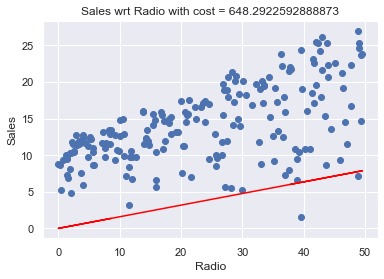

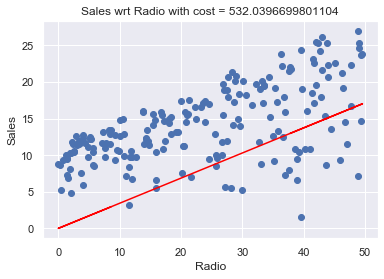

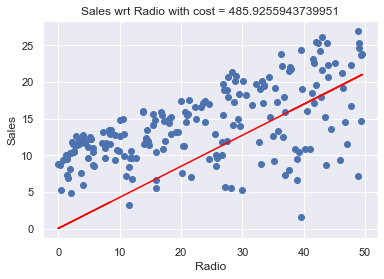

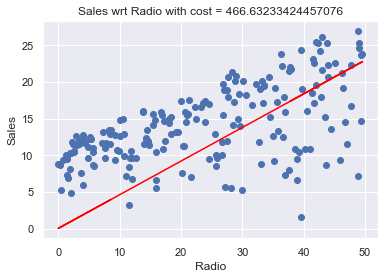

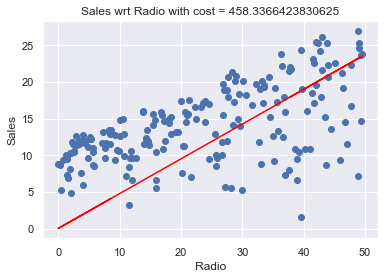

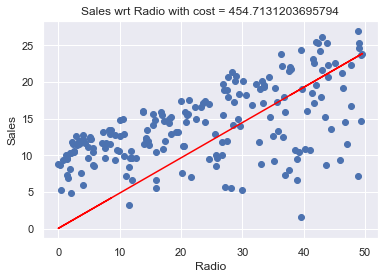

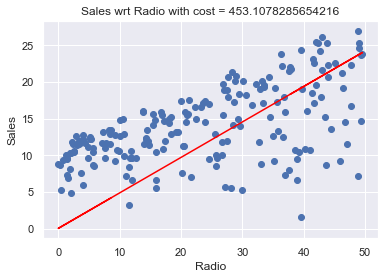

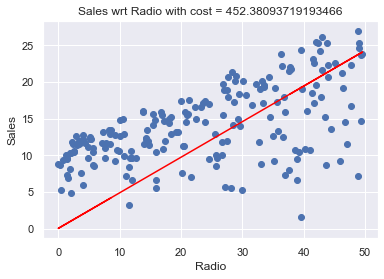

In [22]:
for i in range(0,len(weight_history),5):
    plt.figure()
    plt.scatter(data['radio'], data['sales'])
    plt.plot(data['radio'], data['radio']*weight_history[i] + bias_history[i], color = 'red')
    plt.title('Sales wrt Radio with cost = ' + str(cost_history[i]))
    plt.xlabel('Radio')
    plt.ylabel('Sales')

Text(0, 0.5, 'Value of the cost function')

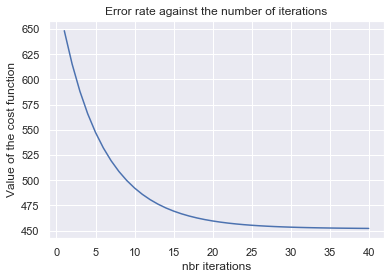

In [23]:
plt.figure()
plt.plot(np.arange(1,iters+1), cost_history)
plt.title('Error rate against the number of iterations')
plt.xlabel('nbr iterations')
plt.ylabel('Value of the cost function')

We can see with this final graph that the cost function strinclty decreases until a certain point. This means that it won't be necessary to do more iteration, the model won't be any better.

Here is the final graph with the final equation:
$ Sales = 0.48*Radio + 0.03 $

Text(0.5, 1.0, 'Linear Regression of Sales given radio')

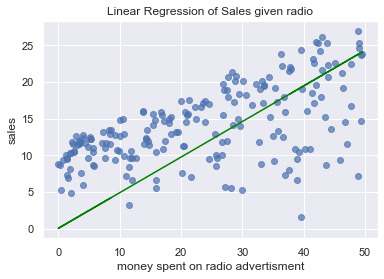

In [24]:
plt.figure()
plt.scatter(data['radio'], data['sales'], alpha = 0.7)
plt.plot(data['radio'], data['radio']*weight + bias, color = 'green')
plt.xlabel('money spent on radio advertisment')
plt.ylabel('sales')
plt.title('Linear Regression of Sales given radio')

## Simple linear Regression with TensorFlow

Text(0.5, 1.0, 'input data set')

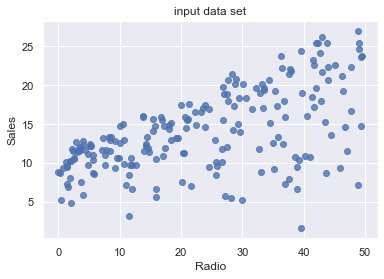

In [25]:
X = data['radio']
y = data['sales']

plt.scatter(X, y, alpha = 0.8)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('input data set')

### Initialization of the variables and prediction
Here we create a LinearModel class that contains two methods:
- **init** that initializes the weight and bias randomly
- **call** that return the predicted sales

In [26]:
class LinearModel:
    
    def __call__(self, x):
        return(self.weight*x + self.bias)
    
    def __init__(self):
        self.weight = tf.Variable(1.)
        self.bias = tf.Variable(0.)

### Creation of the loss function
It is just the MSE as defined previously but the synthax here is a bit different.
- **tf.square** means (x)^2
- **tf.reduce_mean** is the exact same thing as np.mean(). Just calculate the mean of an array.

In [27]:
def loss(y, pred):
    return(tf.reduce_mean(tf.square(y - pred)))

### Training

In [28]:
def train(linear_model, x, y, learning_rate = 0.0001):
    with tf.GradientTape() as t:
        current_loss = loss(y, linear_model(x))
        
    lr_weight, lr_bias = t.gradient(current_loss, [linear_model.weight, linear_model.bias])
    linear_model.weight.assign_sub(learning_rate * lr_weight)
    linear_model.bias.assign_sub(learning_rate * lr_bias)

In [29]:
linear_model = LinearModel()
Weights, Biases = [], []
epochs = 20
for epoch_count in range(epochs):
    Weights.append(linear_model.weight.values) 
    Biases.append(linear_model.bias)
    real_loss = loss(y, linear_model(X))
    train(linear_model, X, y, learning_rate=0.0001)

AttributeError: 'ResourceVariable' object has no attribute 'values'

In [30]:
import tensorflow as tf
import numpy as np

In [31]:
tf.__version__

'2.0.0'

In [32]:
print("Eager mode: ", tf.executing_eagerly())

Eager mode:  False


In [33]:
tf.executing_eagerly()

False

In [35]:
# Build a graph.
a = tf.constant(5.0)
b = tf.constant(6.0)
c = tf.multiply(a,b)

# Launch the graph in a session.
sess = tf.compat.v1.Session()

# Evaluate the tensor `c`.
print(sess.run(c)) # prints 30.0

30.0


In [36]:
print(a) #Doesn't work.

Tensor("Const_2:0", shape=(), dtype=float32)


In [37]:
tf.keras.backend.clear_session() # With this line we clear the previous session and we can build a new one

a = tf.ones([2,3])
b = tf.constant([[2.,2.],[3.,3.],[4.,4.]])
c = tf.matmul(a,b)

sess = tf.compat.v1.Session()
print("a = ", sess.run(a))
print("b = ",sess.run(b))
print("a*b = ",sess.run(c))

a =  [[1. 1. 1.]
 [1. 1. 1.]]
b =  [[2. 2.]
 [3. 3.]
 [4. 4.]]
a*b =  [[9. 9.]
 [9. 9.]]


In [38]:
print(a)
print(b)
print(c)

Tensor("ones:0", shape=(2, 3), dtype=float32)
Tensor("Const:0", shape=(3, 2), dtype=float32)
Tensor("MatMul:0", shape=(2, 2), dtype=float32)


In [92]:
import tensorflow.compat.v1 as tf
from sklearn.model_selection import train_test_split
tf.disable_v2_behavior() 

learning_rate = 0.0005
epochs = 20

X = data['radio']
y = data['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

n_samples = len(X_train)

X = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

#  

w = tf.Variable(tf.random_uniform([1],-1.0,1.0), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

pred = tf.add(tf.multiply(X,w),b)

cost = tf.reduce_mean(tf.square(y - pred))/(2*n_samples)
cost_record = []

init = tf.global_variables_initializer() # Since we have created variables, one must write this line to initialize the varialbes in the session.

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

epoch: 0 error:  1.2306961 weight: [-0.20461287] bias: [0.0108327]


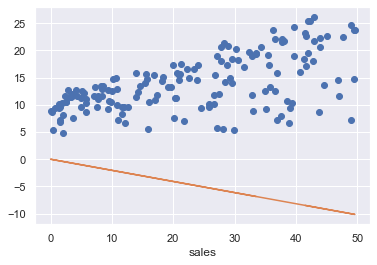

epoch: 5 error:  0.16232292 weight: [0.37733322] bias: [0.0358378]


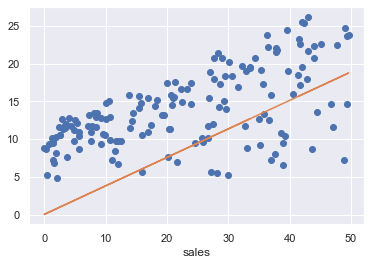

epoch: 10 error:  0.13376296 weight: [0.47180575] bias: [0.04572301]


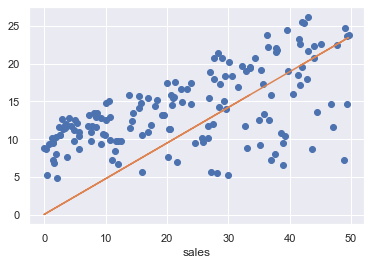

epoch: 15 error:  0.13286097 weight: [0.4869902] bias: [0.05314461]


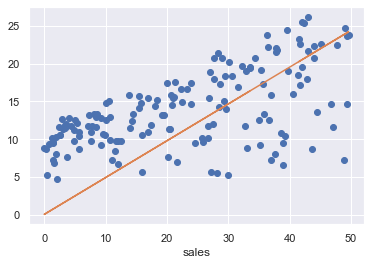

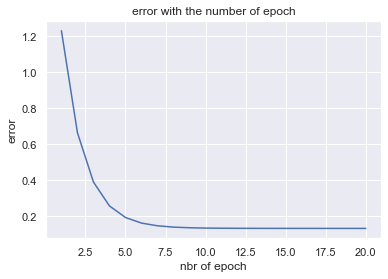

In [93]:
with tf.Session() as sesh:
    # Every operation, assignement we made earlier, will be done in the session
    sesh.run(init) # By creating a session, we create a pointer. Here that point to init and that will run it --> Here we initialize the variable
    
    for epoch in range(epochs):
        for feature, target in zip(X_train,y_train):
            sesh.run(optimizer, feed_dict={X: feature, y: target})
            # With feed_dict we put a value inside each placeholder we createed above
            # We need to do this because the session points on this optimizer which uses X and y
        cost_record.append(sesh.run(cost, feed_dict={X: X_train, y: y_train}))
        
        if epoch%5 == 0:
            c = sesh.run(cost, feed_dict={X: X_train, y: y_train})
            W = sesh.run(w)
            B = sesh.run(b)
            print('epoch: ' + str(epoch) + " error:  " + str(c) + " weight: "+ str(W) + " bias: " + str(B))
    
            plt.figure()
            plt.xlabel('radio')
            plt.xlabel('sales')
            plt.plot(X_train, y_train, 'o')
            plt.plot(X_train, W*X_train + B)
            plt.show()
    
    plt.figure()
    plt.plot(np.arange(1,len(cost_record)+1), cost_record)
    plt.title('error with the number of epoch')
    plt.xlabel('nbr of epoch')
    plt.ylabel('error')
    plt.show()

    

We can see on the last grah that with this number of epoch, we reach a plateau. The error won't decrease any further, our model is trained. We can now compare the two models:

In [99]:
data_params = np.array([[weight,bias],[W[0],B[0]]])
params = pd.DataFrame(data_params, columns=['Weights','Bias'], index=['Simple_Linear','Tensorflow'])
params

,Weights,Bias
Simple_Linear,0.485895,0.033240
Tensorflow,0.486990,0.053145


## Multivariable linear regression
this time we will use more than one feature and again, compare two models: one using tensorflow, the other one without any machine learning package.

In [383]:
path = "C:\\Users\\foucardguimax\\Desktop\\PortFolio\\Advertising.txt"
data_full = pd.read_csv(path, sep=",")
data_full = data_full.drop('Index', axis = 1)
data_full.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


We still have the "sales" column that represents our target, but we now have 3 features: TV, Radio and newspaper.

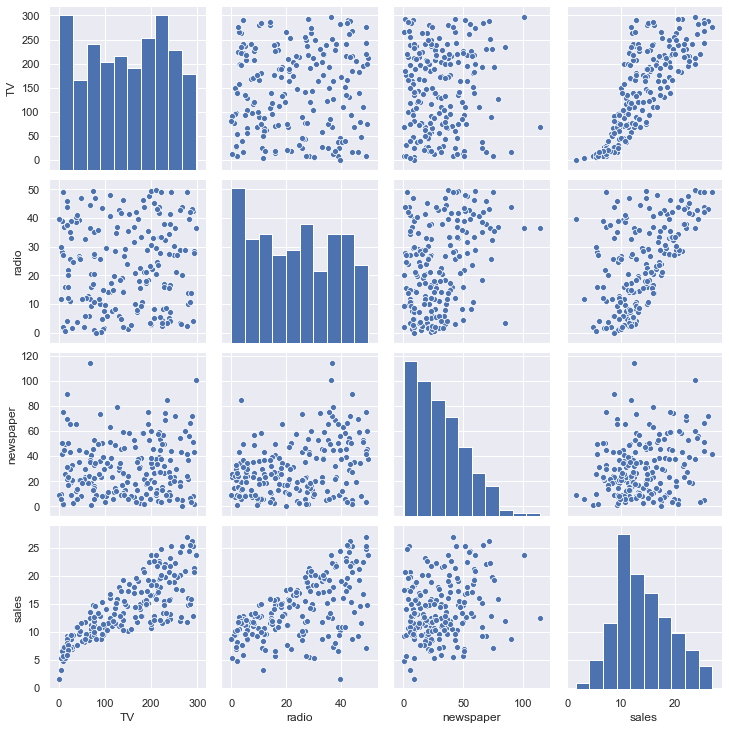

In [384]:
sns.pairplot(data_full)

We can see a lot of very interesting things on this graph. For instance we can find the previous graph of the sales with regard to the amount of money spent on radio advertisement, but also on newspaper and TV. We see that for the laters, the pattern is not as linear as it is with the radio. We also have a bench of information about the distribution of the different graphs (most companies spend a lot on TV, very few spend a lot in newspaper etc...)

## Normalization
Since we now try to build a more complex model, we need to normalize our input data so we can speed up the gradient descrent. We will build a min_max scaler here.

In [385]:
def normalize(features):
    for col in features.columns:
        features[col] -= np.mean(features[col])
        features[col] /= (np.max(features[col]) - np.min(features[col]))
    return(features)

In [386]:
target = data_full['sales']
features = data_full.drop('sales', axis = 1)

features_normed = normalize(features)
print(features_normed.head())

         TV     radio  newspaper
0  0.280884  0.293065   0.339894
1 -0.346779  0.323306   0.127933
2 -0.439102  0.456371   0.340774
3  0.015074  0.363629   0.245787
4  0.114161 -0.251290   0.244908


## Making prediction
What we try to do here is to predict the sales given the following equation:

\begin{equation}
Sales = W_{1}TV + W_{2}Radio + W_{3}Newspaper
\end{equation}


We will implement this using matrices:
\begin{equation}
Sales = \begin{pmatrix}
TV & Radio & Newspaper
\end{pmatrix} * \begin{pmatrix}
W_{1} \\
W_{2} \\
W_{3}
\end{pmatrix} + bias
\end{equation}

In [387]:
def predict(features, weights, biases):
    '''
    features.shape = (200, 3)
    weights.shape = (3,1)
    biases.shape = (200,1)
    predictions.shape = (200,3)
    '''
    
    return(np.add(np.dot(features, weights), biases))

### Initialize weights and biases

In [388]:
w1 = np.random.normal( 0, 0.1)
w2 = np.random.normal( 0, 0.1)
w3 = np.random.normal( 0, 0.1)

weights = np.array([[w1],[w2],[w3]])
print(weights)
print(weights.shape)

[[ 0.06550384]
 [ 0.07387924]
 [-0.02815769]]
(3, 1)


In [389]:
biases = np.zeros([200])
biases = biases.reshape(200,1)
print(biases.shape)

(200, 1)


### Cost function
We will use the same function:\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^n (y_i - (y_{pred}))^2
\end{equation}

but now the equation is the following, the math remains the same
\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^n (y_i - (w_1x_1 + w_2x_2 + w_3x3 + b))^2
\end{equation}

In [390]:
def cost_function2(features, target, weights, biases):
    N = features.shape[0]
    target_1D = target.values
    target_1d = target_1D.reshape(N,1)
    sq_error = (target_1D - predict(features, weights, biases))**2
    return(np.mean(sq_error)/2)

In [391]:
cost_function2(features, target, weights, biases)

111.8585378503087

### Gradient descent
Just like with the linear model, we need to calculate the partial derivatives of the cost function regarding each feature and bias.

\begin{equation}
 grad(f) = \begin{vmatrix} 
 \frac{\partial f}{\partial w_1}\\ 
 \frac{\partial f}{\partial w_2}\\ 
 \frac{\partial f}{\partial w_3}\\
 \frac{\partial f}{\partial b}
 \end{vmatrix} = 
 \begin{vmatrix}
 \frac{1}{N} \sum_{i=1}^n -x_1(y-(w_1x_1+w_2x_2+w_3x_3))\\
 \frac{1}{N} \sum_{i=1}^n -x_2(y-(w_1x_1+w_2x_2+w_3x_3))\\
 \frac{1}{N} \sum_{i=1}^n -x_3(y-(w_1x_1+w_2x_2+w_3x_3))\\
 \frac{1}{N} \sum_{i=1}^n -2(y-(w_1x_1+w_2x_2+w_3x_3)) \end{vmatrix}

In [392]:
def update_weights(features, target, weights, biases, learning_rate):
    N = features.shape[0]
    
    predictions = predict(features, weights, biases)
    target_1D = target.values
    target_1D = target_1D.reshape(200,1)
    
    x1 = features.iloc[:,0].values
    x2 = features.iloc[:,1].values
    x3 = features.iloc[:,2].values
    
    d_w1 = -np.dot(x1,np.add(target_1D,-predictions))
    d_w2 = -np.dot(x2,np.add(target_1D,-predictions))
    d_w3 = -np.dot(x3,np.add(target_1D,-predictions))
    d_b = -2*np.add(target_1D,-predictions)
    
    weights[0][0] -= (learning_rate*np.mean(d_w1))
    weights[1][0] -= (learning_rate*np.mean(d_w1))
    weights[2][0] -= (learning_rate*np.mean(d_w1))
    
    biases -= (learning_rate*np.mean(d_b))
    
    return(weights, biases)

In [393]:
def train2(features, target, weights, biases, learning_rate, iters):
    # "iters" will be the number of iteration
    cost2_history = [] # We will track each values of the cost_function to see it's evolution
    weights_history, biases_history = [],[]
    
    for i in range(iters):
        weights,biases = update_weights(features, target, weights, biases, learning_rate)
        
        #Calculate cost for auditing purposes
        cost2 = cost_function2(features, target, weights, biases)
        cost2_history.append(cost2)
        
        weights_history.append(weight)
        biases_history.append(bias)
        
        if iters%10 == 0:
            print(weights)
            
    return weights, biases, cost2_history, weights_history, biases_history, iters

In [394]:
weights, biases, cost2_history, weights_history, biases_history, iters = train2(features, target, weights, biases, 0.005, 1000)

[[1.23877454]
 [1.24714994]
 [1.14511301]]
[[2.30439607]
 [2.31277147]
 [2.21073454]]
[[3.27224539]
 [3.28062079]
 [3.17858386]]
[[4.15129323]
 [4.15966863]
 [4.0576317 ]]
[[4.94968725]
 [4.95806265]
 [4.85602572]]
[[5.67482754]
 [5.68320295]
 [5.58116602]]
[[6.33343524]
 [6.34181064]
 [6.23977371]]
[[6.93161479]
 [6.93999019]
 [6.83795326]]
[[7.47491056]
 [7.48328597]
 [7.38124904]]
[[7.96835822]
 [7.97673362]
 [7.87469669]]
[[8.41653139]
 [8.42490679]
 [8.32286986]]
[[8.82358406]
 [8.83195946]
 [8.72992253]]
[[9.19328911]
 [9.20166451]
 [9.09962758]]
[[9.52907322]
 [9.53744862]
 [9.43541169]]
[[9.83404868]
 [9.84242408]
 [9.74038715]]
[[10.11104224]
 [10.11941764]
 [10.01738071]]
[[10.36262126]
 [10.37099666]
 [10.26895973]]
[[10.59111757]
 [10.59949297]
 [10.49745604]]
[[10.79864903]
 [10.80702444]
 [10.70498751]]
[[10.98713921]
 [10.99551461]
 [10.89347768]]
[[11.15833515]
 [11.16671056]
 [11.06467363]]
[[11.31382364]
 [11.32219904]
 [11.22016211]]
[[11.45504585]
 [11.46342125]
 [1

 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [1

 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [1

[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12.75934617]]
[[12.8530077 ]
 [12.8613831 ]
 [12

Text(0, 0.5, 'Value of the cost function')

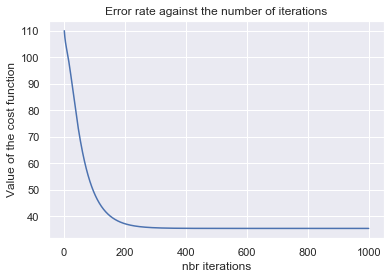

In [395]:
plt.figure()
plt.plot(np.arange(1,iters+1), cost2_history)
plt.title('Error rate against the number of iterations')
plt.xlabel('nbr iterations')
plt.ylabel('Value of the cost function')

## Multivariable linear regression with tensorflow

In [399]:
data_full.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [402]:
def get_normalization_parameters(traindf, features):
    """Get the normalization parameters (E.g., mean, std) for traindf for 
    features. We will use these parameters for training, eval, and serving."""

    def _z_score_params(column):
        mean = traindf[column].mean()
        std = traindf[column].std()
        return {'mean': mean, 'std': std}

    normalization_parameters = {}
    for column in features:
        normalization_parameters[column] = _z_score_params(column)
    return normalization_parameters

NUMERIC_FEATURES = ['TV','radio','newspaper']
normalization_parameters = get_normalization_parameters(data_full, NUMERIC_FEATURES)

In [403]:
print(normalization_parameters)

{'TV': {'mean': 147.0425, 'std': 85.85423631490808}, 'radio': {'mean': 23.264000000000006, 'std': 14.846809176168724}, 'newspaper': {'mean': 30.553999999999995, 'std': 21.778620838522826}}


In [406]:
def _numeric_column_normalized(column_name, normalizer_fn):
    return tf.feature_column.numeric_column(column_name, normalizer_fn=normalizer_fn)

def _make_zscaler(mean, std):
    def zscaler(col):
        return (col - mean)/std
    return zscaler

# Define your feature columns
def create_feature_cols(features, use_normalization):
    """Create feature columns using tf.feature_column. 
    
    This function will get executed during training, evaluation, and serving."""
    def normalize_column(col):  # Use mean, std defined below.
        return (col - mean)/std
    normalized_feature_columns = []
    for column_name in features:
        normalizer_fn = None
        if use_normalization:
            column_params = normalization_parameters[column_name]
            mean = column_params['mean']
            std = column_params['std']
            normalizer_fn = _make_zscaler(mean, std)
        normalized_feature_columns.append(_numeric_column_normalized(column_name,
                                                                     normalizer_fn))
    return normalized_feature_columns

NUMERIC_FEATURES = ['TV','radio','newspaper']
feature_columns = create_feature_cols(NUMERIC_FEATURES, use_normalization=True)

In [407]:
feature_columns

[NumericColumn(key='TV', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=<function _make_zscaler.<locals>.zscaler at 0x000002B97CA680D8>),
 NumericColumn(key='radio', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=<function _make_zscaler.<locals>.zscaler at 0x000002B97CA68558>),
 NumericColumn(key='newspaper', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=<function _make_zscaler.<locals>.zscaler at 0x000002B97CA685E8>)]

In [410]:
print(type(feature_columns[0]))

<class 'tensorflow.python.feature_column.feature_column_v2.NumericColumn'>


### Preprocessing the data

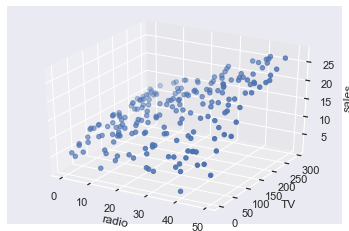

In [440]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = data_full['sales']
xdata = data_full['radio']
ydata = data_full['TV']
ax.scatter3D(xdata, ydata, zdata, cmap='rainbow');

ax.set_xlabel('radio')
ax.set_ylabel('TV')
ax.set_zlabel('sales');

#ax.view_init(45, 45)
#, c=zdata

In [443]:
D = np.matrix(data_full.values)
inputs = D[:,0:3].transpose()
target = D[:,3].transpose()

n = 3

### Defining the model

In [444]:
# Let's define the placeholders
x = tf.placeholder(tf.float32, shape=(n, None))
y = tf.placeholder(tf.float32, shape=(1, None))

# Then the trainable variables
w = tf.get_variable('weights', shape=(1, n))
b = tf.get_variable('biases', shape=())

# Define the model output
y_pred = tf.add(tf.matmul(w,x),b)

#Define the loss function
L = tf.reduce_sum((y_pred - y)**2)

init = tf.global_variables_initializer()

ValueError: Variable weights already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "C:\Users\foucardguimax\miniconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1751, in __init__
    self._traceback = tf_stack.extract_stack()
  File "C:\Users\foucardguimax\miniconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3429, in _create_op_internal
    op_def=op_def)
  File "C:\Users\foucardguimax\miniconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3360, in create_op
    attrs, op_def, compute_device)
  File "C:\Users\foucardguimax\miniconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\foucardguimax\miniconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\framework\op_def_library.py", line 793, in _apply_op_helper
    op_def=op_def)


### Training the model

In [446]:
# Define the optimizer object
optimizer = tf.train.AdamOptimizer(learning_rate = 0.1).minimize(L)

#Create a session and initialize variables
with tf.Session() as sesh:
    sesh.run(init)
    
    # Optimization loop
    for t in range(2000):
        _, current_loss, current_w, current_b = session.run([optimizer, L, w, b], feed_dict = {x: inputs, y: target})
        print("t = %g, loss = %g, A = %s, b = %g" % (t, current_loss, str(current_A), current_b))

NameError: name 'session' is not defined

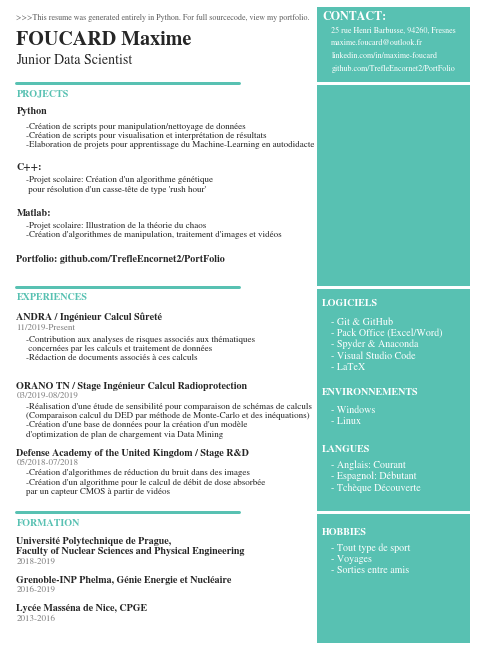

In [22]:
# Text Variables
Header = '>>>This resume was generated entirely in Python. For full sourcecode, view my portfolio.'
Name = 'FOUCARD Maxime'
Title = 'Junior Data Scientist'
ContactHeader = 'CONTACT:'
Adress = '25 rue Henri Barbusse, 94260, Fresnes'
Mail = 'maxime.foucard@outlook.fr'
Linkedin = 'linkedin.com/in/maxime-foucard'
Github = 'github.com/TrefleEncornet2/PortFolio'
ProjectsHeader = 'PROJECTS'
ProjectOneTitle = 'Python'
ProjectOneDesc = '-Création de scripts pour manipulation/nettoyage de données\n-Création de scripts pour visualisation et interprétation de résultats\n-Elaboration de projets pour apprentissage du Machine-Learning en autodidacte'
ProjectTwoTitle = "C++:"
ProjectTwoDesc = "-Projet scolaire: Création d'un algorithme génétique \n pour résolution d'un casse-tête de type 'rush hour'"
ProjectThreeTitle = 'Matlab:'
ProjectThreeDesc = "-Projet scolaire: Illustration de la théorie du chaos \n-Création d'algorithmes de manipulation, traitement d'images et vidéos"
Portfolio = 'Portfolio: github.com/TrefleEncornet2/PortFolio'
WorkHeader = 'EXPERIENCES'
WorkOneTitle = 'ANDRA / Ingénieur Calcul Sûreté'
WorkOneTime = '11/2019-Present'
WorkOneDesc = '-Contribution aux analyses de risques associés aux thématiques\n concernées par les calculs et traitement de données \n-Rédaction de documents associés à ces calculs'
WorkTwoTitle = 'ORANO TN / Stage Ingénieur Calcul Radioprotection'
WorkTwoTime = '03/2019-08/2019'
WorkTwoDesc = "-Réalisation d'une étude de sensibilité pour comparaison de schémas de calculs \n(Comparaison calcul du DED par méthode de Monte-Carlo et des inéquations) \n-Création d'une base de données pour la création d'un modèle \nd'optimization de plan de chargement via Data Mining"
WorkThreeTitle = 'Defense Academy of the United Kingdom / Stage R&D'
WorkThreeTime = '05/2018-07/2018'
WorkThreeDesc = "-Création d'algorithmes de réduction du bruit dans des images \n-Création d'un algorithme pour le calcul de débit de dose absorbée \npar un capteur CMOS à partir de vidéos"
EduHeader = 'FORMATION'
EduOneTitle = 'Université Polytechnique de Prague, \nFaculty of Nuclear Sciences and Physical Engineering'
EduOneTime = '2018-2019'
#EduOneDesc = '- Major: Management, Minor: Statistics'
EduTwoTitle = 'Grenoble-INP Phelma, Génie Energie et Nucléaire'
EduTwoTime = '2016-2019'
EduThreeTitle = 'Lycée Masséna de Nice, CPGE'
EduThreeTime = '2013-2016'
#SkillsHeader = 'Programming'
#SkillsDesc = '- Python\n- Pandas\n- NumPy\n- Data Visualization\n- Data Cleaning\n- Command Line\n- Git and Version Control\n- SQL\n- APIs\n- Probability/Statistics\n- Data Manipulation\n- Excel'
#SoftwareHeader = 'Numpy\n Pandas\n Matplotlib\n Seaborn\n SKlearn\n TensorFlow'
ExtrasDesc = 'Learned popular data science\nlanguages, data cleaning and\nmanipulation, machine learning \nand statistical analysis'
HobbiesTitle = 'HOBBIES'
HobbiesDesc = '- Tout type de sport\n- Voyages\n- Sorties entre amis'
LanguesTitle ='LANGUES'
LanguesDesc = '- Anglais: Courant\n- Espagnol: Débutant\n- Tchèque Découverte'
SoftwareTitle = 'LOGICIELS'
SoftwareDesc = '- Git & GitHub\n- Pack Office (Excel/Word)\n- Spyder & Anaconda\n- Visual Studio Code\n- LaTeX'
EnvTitle = 'ENVIRONNEMENTS'
EnvDesc = '- Windows\n- Linux'
# Setting style for bar graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'STIXGeneral'
fig, ax = plt.subplots(figsize=(8.3, 11.7))

# Decorative Lines
plt.axvline(x=.5, ymin=0, ymax=1, color='#fc0303', alpha=0.0, linewidth=50)
plt.axvline(x=.99, color='#58C1B2', alpha = 1, linewidth=298)
plt.axhline(y=.88, xmin=0, xmax=1, color='#ffffff', linewidth=3)

plt.axhline(y=.88, xmin=0.02, xmax=0.5, color='#58C1B2', linewidth=3)
plt.axhline(y=.56, xmin=0.02, xmax=0.5, color='#58C1B2', linewidth=3)
plt.axhline(y=.205, xmin=0.02, xmax=0.5, color='#58C1B2', linewidth=3)

plt.axhline(y=.56, xmin=0.6, xmax=1, color='#ffffff', linewidth=3)
plt.axhline(y=.205, xmin=0.6, xmax=1, color='#ffffff', linewidth=3)

# set background color
ax.set_facecolor('white')

# remove axes
plt.axis('off')

# add text
plt.annotate(Header, (.02,.98), weight='regular', fontsize=8, alpha=.75)
plt.annotate(Name, (.02,.94), weight='bold', fontsize=20)
plt.annotate(Title, (.02,.91), weight='regular', fontsize=14)
plt.annotate(ContactHeader, (.68,.98), weight='bold', fontsize=12, color='#ffffff')
plt.annotate(Adress, (.7,.96), weight='regular', fontsize=8, color='#ffffff')
plt.annotate(Mail, (.7,.94), weight='regular', fontsize=8, color='#ffffff')
plt.annotate(Linkedin, (.7,.92), weight='regular', fontsize=8, color='#ffffff')
plt.annotate(Github, (.7,.90), weight='regular', fontsize=8, color='#ffffff')
plt.annotate(ProjectsHeader, (.02,.86), weight='bold', fontsize=10, color='#58C1B2')
plt.annotate(ProjectOneTitle, (.02,.832), weight='bold', fontsize=10)
plt.annotate(ProjectOneDesc, (.04,.78), weight='regular', fontsize=9)
plt.annotate(ProjectTwoTitle, (.02,.745), weight='bold', fontsize=10)
plt.annotate(ProjectTwoDesc, (.04,.71), weight='regular', fontsize=9)
plt.annotate(ProjectThreeTitle, (.02,.672), weight='bold', fontsize=10)
plt.annotate(ProjectThreeDesc, (.04,.638), weight='regular', fontsize=9)
plt.annotate(Portfolio, (.02,.6), weight='bold', fontsize=10)
plt.annotate(WorkHeader, (.02,.54), weight='bold', fontsize=10, color='#58C1B2')
plt.annotate(WorkOneTitle, (.02,.508), weight='bold', fontsize=10)
plt.annotate(WorkOneTime, (.02,.493), weight='regular', fontsize=9, alpha=.6)
plt.annotate(WorkOneDesc, (.04,.445), weight='regular', fontsize=9)
plt.annotate(WorkTwoTitle, (.02,.4), weight='bold', fontsize=10)
plt.annotate(WorkTwoTime, (.02,.385), weight='regular', fontsize=9, alpha=.6)
plt.annotate(WorkTwoDesc, (.04,.325), weight='regular', fontsize=9)
plt.annotate(WorkThreeTitle, (.02,.295), weight='bold', fontsize=10)
plt.annotate(WorkThreeTime, (.02,.28), weight='regular', fontsize=9, alpha=.6)
plt.annotate(WorkThreeDesc, (.04,.235), weight='regular', fontsize=9)
plt.annotate(EduHeader, (.02,.185), weight='bold', fontsize=10, color='#58C1B2')
plt.annotate(EduOneTitle, (.02,.14), weight='bold', fontsize=10)
plt.annotate(EduOneTime, (.02,.125), weight='regular', fontsize=9, alpha=.6)
#plt.annotate(EduOneDesc, (.04,.125), weight='regular', fontsize=9)
plt.annotate(EduTwoTitle, (.02,.095), weight='bold', fontsize=10)
plt.annotate(EduTwoTime, (.02,.08), weight='regular', fontsize=9, alpha=.6)
plt.annotate(EduThreeTitle, (.02,.05), weight='bold', fontsize=10)
plt.annotate(EduThreeTime, (.02,.035), weight='regular', fontsize=9, alpha=.6)

#plt.annotate(SkillsHeader, (.7,.86), weight='bold', fontsize=10, color='#ffffff')
#plt.annotate(SkillsDesc, (.7,.56), weight='regular', fontsize=10, color='#ffffff')
#plt.annotate(SoftwareHeader, (.68,.60), weight='regular', fontsize=8, color='#ffffff')
plt.annotate(SoftwareTitle, (.68,.53), weight='bold', fontsize=10, color='#ffffff')
plt.annotate(SoftwareDesc, (.7,.43), weight='regular', fontsize=10, color='#ffffff')
plt.annotate(EnvTitle, (.68,.39), weight='bold', fontsize=10, color='#ffffff')
plt.annotate(EnvDesc, (.7,.345), weight='regular', fontsize=10, color='#ffffff')
plt.annotate(LanguesTitle, (.68,.30), weight='bold', fontsize=10, color='#ffffff')
plt.annotate(LanguesDesc, (.7,.24), weight='regular', fontsize=10, color='#ffffff')
plt.annotate(HobbiesTitle, (.68,.17), weight='bold', fontsize=10, color='#ffffff')
plt.annotate(HobbiesDesc, (.7,.11), weight='regular', fontsize=10, color='#ffffff')


#add graphs and pictures: with this way doing it, the quality won't be optimal
"""
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

skill_diagram = mpimg.imread('C:\\Users\\foucardguimax\\Desktop\\PYTHON\\Python3.7\\Machine-learnia\\Regression\\\skill_diagram2.jpg')
imagebox = OffsetImage(skill_diagram, zoom=0.1)
ab = AnnotationBbox(imagebox, (0.84, 0.78), frameon=False)

pic = mpimg.imread('C:\\Users\\foucardguimax\\Desktop\\PYTHON\\Python3.7\\Machine-learnia\\Regression\\pic.png')
imagebox2 = OffsetImage(pic, zoom=0.13)
ab2 = AnnotationBbox(imagebox2, (0.55, 0.89), frameon=False)

ax.add_artist(ab)
ax.add_artist(ab2)
"""



plt.savefig('C:\\Users\\foucardguimax\\Desktop\\Emploi\\Data_Sience\\resume.jpeg', quality=100, optimize=True, bbox_inches='tight', dpi=500)

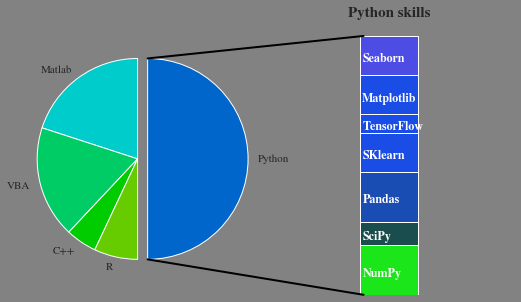

In [2]:
from matplotlib.patches import ConnectionPatch
import numpy as np
from pylab import *

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5), facecolor='#828282')
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [.50, .20, .18, .05, .07]
labels = ['Python', 'Matlab', 'VBA', 'C++', 'R']
colors = np.array(['#0066CC','#00CCCC','#00CC66','#00CC00','#66CC00'])
explode = [0.1, 0, 0, 0, 0]

# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios,autopct=None, startangle=angle,
        labels=labels, explode=explode, labeldistance=1.1, colors=colors)

# bar chart parameters

xpos = 0
bottom = 0
ratios = [.19, .09, .19, .15, .07, .15, .15]
width = .2
colors = [[.1, .9, .1], [.1, .3, .3], [.1, .3, .7], [.1, .3, .9], [.1, .3, .9], [.1, .3, .9], [.3, .3, .9]]
packages = ['NumPy', 'SciPy', 'Pandas', 'SKlearn', 'TensorFlow', 'Matplotlib','Seaborn']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width+0.03, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos-0.105, ypos-0.025, packages[j], fontsize=12, color='white',weight='bold')
    
# "%d%%" % (ax2.patches[j].get_height() * 100), ha='center'

ax2.set_title('Python skills', fontsize=15, weight='bold')
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)

plt.savefig('C:\\Users\\foucardguimax\\Desktop\\PYTHON\\Python3.7\\Machine-learnia\\Regression\\skill_diagram2.jpg', dpi=300, bbox_inches='tight', facecolor='#828282', quality = 95)
plt.show()

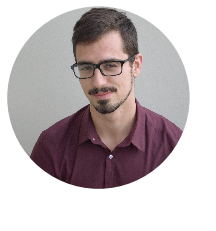

In [654]:
import matplotlib.patches as patches
import matplotlib.cbook as cbook


with cbook.get_sample_data('C:\\Users\\foucardguimax\\Desktop\\PERSO\\Photo_CV(2).jpg') as image_file:
    image = plt.imread(image_file)

fig, ax = plt.subplots()
im = ax.imshow(image)
patch = patches.Circle((1300, 1300), radius=1300, transform=ax.transData, edgecolor = '#fc0303')
im.set_clip_path(patch)

ax.axis('off')

plt.savefig('C:\\Users\\foucardguimax\\Desktop\\PYTHON\\Python3.7\\Machine-learnia\\Regression\\pic.png', dpi=300, bbox_inches='tight')

plt.show()

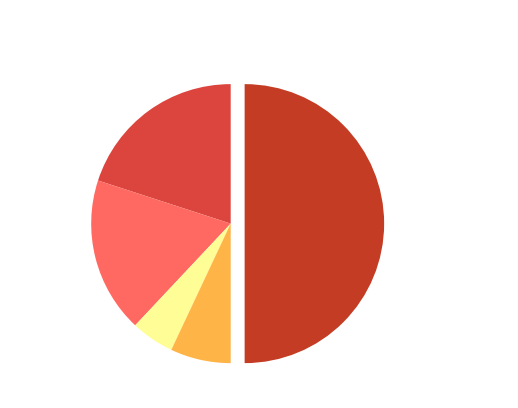

In [111]:
from matplotlib.patches import ConnectionPatch
import numpy as np
from pylab import *
import matplotlib as mpl
mpl.rcParams['font.size'] = 50

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5), facecolor='#ffffff')
ax1 = fig.add_subplot(121)

fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [.50, .20, .18, .05, .07]
labels = ['Python', 'Matlab', 'VBA', 'C++', 'R']
colors = np.array(['#C33C23','#DC453D','#FF6961','#FFFD96','#FFB447'])

explode = [0.1, 0, 0, 0, 0]

# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]

ax1.pie(ratios,autopct=None, startangle=angle,
        labels=labels, explode=explode, labeldistance=1.1, colors=colors, textprops={'fontsize': 20, 'color':'white', 'weight':'bold'})
ax1.set_title('Prgramming skills:', fontsize = 30, weight = 'bold', color ='white')
plt.savefig('C:\\Users\\foucardguimax\\Desktop\\Emploi\\Data_Sience\\programming_diagram.jpeg', dpi=500, bbox_inches='tight', facecolor='#58C1B2', quality = 95)

plt.show()

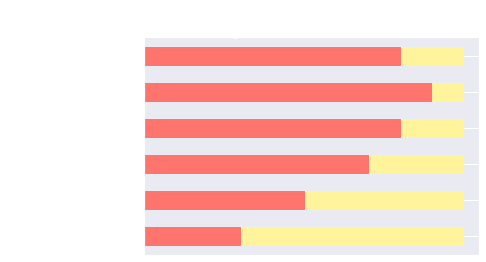

In [141]:
import numpy as np
import matplotlib.pyplot as plt

labels= ['TensorFlow', 'SKlearn','Seaborn','Matplotlib','Pandas','NumPy']
women_means = [3,5,7,8,9,8]
men_means = [10, 10, 10, 10, 10, 10]
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

bar_men = ax.barh(labels, men_means, width, label='Men', edgecolor='black')
bar_women = ax.barh(labels, women_means, width, label='Women', edgecolor='black')

for i in range(len(bar_men)):
    bar_men[i].set_color('#FFF49C')
    bar_women[i].set_color('#FF756D')

ax.set_title('Python skills:', fontsize = 35, weight = 'bold', color ='white')
ax.xaxis.set_visible(False)
ax.set_yticklabels(labels, color = 'white', fontsize=25, weight='bold')

plt.axis('on')

plt.savefig('C:\\Users\\foucardguimax\\Desktop\\Emploi\\Data_Sience\\Python_skill.jpeg', dpi=500, bbox_inches='tight', facecolor='#58C1B2', quality = 95, fontcolor='#58C1B2')


plt.show()

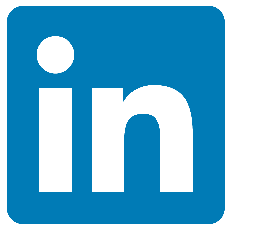

In [149]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cbook as cbook

img = 'C:\\Users\\foucardguimax\\Desktop\\Emploi\\Data_Sience\\linkedin_logo.png'
with cbook.get_sample_data(img) as image_file:
    image = plt.imread(image_file)

fig, ax = plt.subplots()
im = ax.imshow(image)
patch = patches.Circle((260, 200), radius=200, transform=ax.transData)
im.set_clip_path(patch)

ax.axis('off')
plt.show()